# Install Necessary Library


In [1]:
!pip install tensorflow==2.10
!pip install deepctr[cpu]
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rajmehra03/movielens100k
! unzip /content/movielens100k.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.10.0 which is incompatible.
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rajmehra03/movielens100k
License(s): unknown
  0% 0.00/1.69M [00:00<?, ?B/s]
100% 1.69M/1.69M [00:00<00:00, 118MB/s]
Archive:  /content/movielens100k.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflati

# Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import log_loss, roc_auc_score , mean_squared_error


from itertools import chain

import tensorflow as tf
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dense, Concatenate ,Flatten ,Lambda
from keras.utils import pad_sequences

from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from deepctr.feature_column import build_input_features, get_linear_logit, DEFAULT_GROUP_NAME, input_from_feature_columns
from deepctr.layers.core import PredictionLayer, DNN
from deepctr.layers.interaction import FM ,InteractingLayer
from deepctr.layers.utils import concat_func, add_func, combined_dnn_input

from deepctr.feature_column import build_input_features, get_linear_logit, input_from_feature_columns ,VarLenSparseFeat

from deepctr.layers.core import PredictionLayer, DNN ,RegulationModule
from deepctr.layers.interaction import CrossNet ,BridgeModule
from deepctr.layers.utils import add_func, combined_dnn_input


# Read Data

In [3]:
ratings = pd.read_csv('/content/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [4]:
movie = pd.read_csv("/content/movies.csv")
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [5]:
data = pd.merge(movie, ratings, on='movieId')
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091
...,...,...,...,...,...,...
99999,161944,The Last Brickmaker in America (2001),Drama,287,5.0,1470167824
100000,162376,Stranger Things,Drama,73,4.5,1474255532
100001,162542,Rustom (2016),Romance|Thriller,611,5.0,1471520667
100002,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611,3.0,1471523986


# Prepare Data

In [6]:
def split(x):
    key_ans = x.split('|')
    for key in key_ans:
        if key not in key2index:
            # Notice : input value 0 is a special "padding",so we do not use 0 to encode valid feature for sequence input
            key2index[key] = len(key2index) + 1
    return list(map(lambda x: key2index[x], key_ans))


if __name__ == "__main__":
    sparse_features = ["movieId", "userId"]
    target = ['rating']

    # 1.Label Encoding for sparse features,and process sequence features
    for feat in sparse_features:
        lbe = LabelEncoder()
        data[feat] = lbe.fit_transform(data[feat])
    # preprocess the sequence feature

    key2index = {}
    genres_list = list(map(split, data['genres'].values))
    genres_length = np.array(list(map(len, genres_list)))
    max_len = max(genres_length)
    # Notice : padding=`post`
    genres_list = pad_sequences(genres_list, maxlen=max_len, padding='post', )

    # 2.count #unique features for each sparse field and generate feature config for sequence feature

    fixlen_feature_columns = [SparseFeat(feat, data[feat].max() + 1, embedding_dim=4)
                              for feat in sparse_features]

    use_weighted_sequence = False
    if use_weighted_sequence:
        varlen_feature_columns = [VarLenSparseFeat(SparseFeat('genres', vocabulary_size=len(
            key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean',
                                                   weight_name='genres_weight')]  # Notice : value 0 is for padding for sequence input feature
    else:
        varlen_feature_columns = [VarLenSparseFeat(SparseFeat('genres', vocabulary_size=len(
            key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean',
                                                   weight_name=None)]  # Notice : value 0 is for padding for sequence input feature

    linear_feature_columns = fixlen_feature_columns + varlen_feature_columns
    dnn_feature_columns = fixlen_feature_columns + varlen_feature_columns

    feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

    # 3.generate input data for model
    model_input = {name: data[name] for name in feature_names}  #
    model_input["genres"] = genres_list
    model_input["genres_weight"] = np.random.randn(data.shape[0], max_len, 1)


# Deep and Cross Network

In [7]:
def DCN(linear_feature_columns, dnn_feature_columns, cross_num=2, cross_parameterization='vector',
        dnn_hidden_units=(256, 128, 64), l2_reg_linear=1e-5, l2_reg_embedding=1e-5,
        l2_reg_cross=1e-5, l2_reg_dnn=0, seed=1024, dnn_dropout=0, dnn_use_bn=False,
        dnn_activation='relu', task='regression'):

    if len(dnn_hidden_units) == 0 and cross_num == 0:
        raise ValueError("Either hidden_layer or cross layer must > 0")

    features = build_input_features(dnn_feature_columns)
    inputs_list = list(features.values())

    linear_logit = get_linear_logit(features, linear_feature_columns, seed=seed, prefix='linear',
                                    l2_reg=l2_reg_linear)

    sparse_embedding_list, dense_value_list = input_from_feature_columns(features, dnn_feature_columns,
                                                                         l2_reg_embedding, seed)

    dnn_input = combined_dnn_input(sparse_embedding_list, dense_value_list)

    if len(dnn_hidden_units) > 0 and cross_num > 0:  # Deep & Cross
        deep_out = DNN(dnn_hidden_units, dnn_activation, l2_reg_dnn, dnn_dropout, dnn_use_bn, seed=seed)(dnn_input)
        cross_out = CrossNet(cross_num, parameterization=cross_parameterization, l2_reg=l2_reg_cross)(dnn_input)
        stack_out = Concatenate()([cross_out, deep_out])
        final_logit = Dense(1, use_bias=False)(stack_out)
    elif len(dnn_hidden_units) > 0:  # Only Deep
        deep_out = DNN(dnn_hidden_units, dnn_activation, l2_reg_dnn, dnn_dropout, dnn_use_bn, seed=seed)(dnn_input)
        final_logit = Dense(1, use_bias=False)(deep_out)
    elif cross_num > 0:  # Only Cross
        cross_out = CrossNet(cross_num, parameterization=cross_parameterization, l2_reg=l2_reg_cross)(dnn_input)
        final_logit = Dense(1, use_bias=False)(cross_out)
    else:  # Error
        raise NotImplementedError

    final_logit = add_func([final_logit, linear_logit])
    output = PredictionLayer(task)(final_logit)

    model = Model(inputs=inputs_list, outputs=output)

    return model

In [8]:
model = DCN(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(model_input, data[target].values,
                    batch_size=256, epochs=10, verbose=2, validation_split=0.2, )

CrossNet parameterization: vector
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/functional.py:587: UserWarning: Input dict contained keys ['genres_weight'] which did not match any model input. They will be ignored by the model.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/functional.py:587: UserWarning: Input dict contained keys ['genres_weight'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


313/313 - 7s - loss: 1.6967 - mse: 1.6967 - val_loss: 0.9411 - val_mse: 0.9410
Epoch 2/10
313/313 - 6s - loss: 0.7606 - mse: 0.7604 - val_loss: 0.9840 - val_mse: 0.9838
Epoch 3/10
313/313 - 4s - loss: 0.7357 - mse: 0.7354 - val_loss: 0.9509 - val_mse: 0.9506
Epoch 4/10
313/313 - 3s - loss: 0.7129 - mse: 0.7126 - val_loss: 0.8951 - val_mse: 0.8947
Epoch 5/10
313/313 - 4s - loss: 0.6987 - mse: 0.6983 - val_loss: 0.9896 - val_mse: 0.9891
Epoch 6/10
313/313 - 3s - loss: 0.6894 - mse: 0.6889 - val_loss: 0.9586 - val_mse: 0.9581
Epoch 7/10
313/313 - 3s - loss: 0.6778 - mse: 0.6773 - val_loss: 0.9425 - val_mse: 0.9419
Epoch 8/10
313/313 - 5s - loss: 0.6643 - mse: 0.6636 - val_loss: 0.9490 - val_mse: 0.9483
Epoch 9/10
313/313 - 6s - loss: 0.6557 - mse: 0.6549 - val_loss: 0.9285 - val_mse: 0.9277
Epoch 10/10
313/313 - 5s - loss: 0.6458 - mse: 0.6450 - val_loss: 0.9367 - val_mse: 0.9358


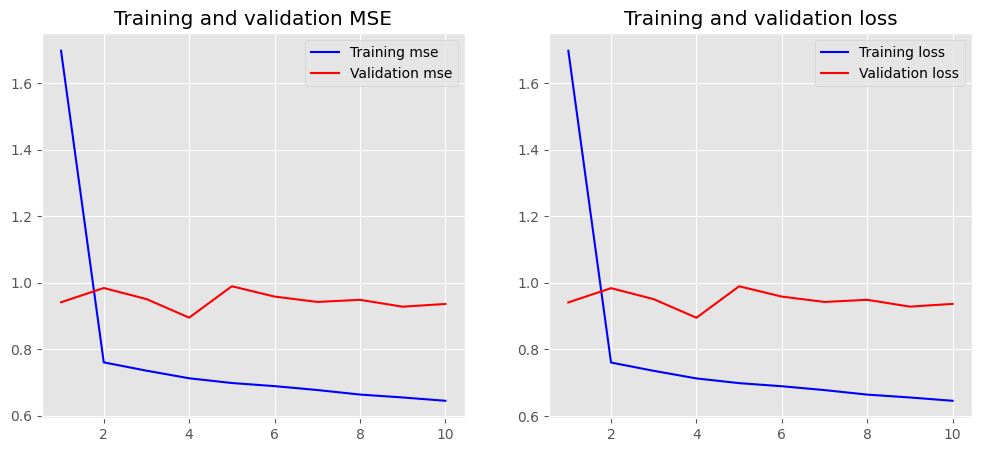

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['mse']
    val_acc = history.history['val_mse']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training mse')
    plt.plot(x, val_acc, 'r', label='Validation mse')
    plt.title('Training and validation MSE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

# Dual Input Factorization Machine

In [10]:
def DIFM(linear_feature_columns, dnn_feature_columns,
         att_embedding_size=8, att_head_num=8, att_res=True, dnn_hidden_units=(256, 128, 64),
         l2_reg_linear=0.00001, l2_reg_embedding=0.00001, l2_reg_dnn=0, seed=1024, dnn_dropout=0,
         dnn_activation='relu', dnn_use_bn=False, task='regression'):


    if not len(dnn_hidden_units) > 0:
        raise ValueError("dnn_hidden_units is null!")

    features = build_input_features(
        linear_feature_columns + dnn_feature_columns)

    sparse_feat_num = len(list(filter(lambda x: isinstance(x, SparseFeat) or isinstance(x, VarLenSparseFeat),
                                      dnn_feature_columns)))
    inputs_list = list(features.values())

    sparse_embedding_list, _ = input_from_feature_columns(features, dnn_feature_columns,
                                                          l2_reg_embedding, seed)

    if not len(sparse_embedding_list) > 0:
        raise ValueError("there are no sparse features")

    att_input = concat_func(sparse_embedding_list, axis=1)
    att_out = InteractingLayer(att_embedding_size, att_head_num, att_res, scaling=True)(att_input)
    att_out = Flatten()(att_out)
    m_vec = Dense(sparse_feat_num, use_bias=False)(att_out)

    dnn_input = combined_dnn_input(sparse_embedding_list, [])
    dnn_output = DNN(dnn_hidden_units, dnn_activation, l2_reg_dnn, dnn_dropout, dnn_use_bn, seed=seed)(dnn_input)
    m_bit = Dense(sparse_feat_num, use_bias=False)(dnn_output)

    input_aware_factor = add_func([m_vec, m_bit])  # the complete input-aware factor m_x

    linear_logit = get_linear_logit(features, linear_feature_columns, seed=seed, prefix='linear',
                                    l2_reg=l2_reg_linear, sparse_feat_refine_weight=input_aware_factor)

    fm_input = concat_func(sparse_embedding_list, axis=1)
    refined_fm_input = Lambda(lambda x: x[0] * tf.expand_dims(x[1], axis=-1))(
        [fm_input, input_aware_factor])
    fm_logit = FM()(refined_fm_input)

    final_logit = add_func([linear_logit, fm_logit])

    output = PredictionLayer(task)(final_logit)
    model = Model(inputs=inputs_list, outputs=output)
    return model

In [11]:
model = DIFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(model_input, data[target].values,
                    batch_size=256, epochs=10, verbose=2, validation_split=0.2, )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/functional.py:587: UserWarning: Input dict contained keys ['genres_weight'] which did not match any model input. They will be ignored by the model.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/functional.py:587: UserWarning: Input dict contained keys ['genres_weight'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


313/313 - 10s - loss: 2.7090 - mse: 2.7089 - val_loss: 1.1790 - val_mse: 1.1789
Epoch 2/10
313/313 - 8s - loss: 0.7752 - mse: 0.7751 - val_loss: 1.0806 - val_mse: 1.0805
Epoch 3/10
313/313 - 5s - loss: 0.7502 - mse: 0.7501 - val_loss: 1.0550 - val_mse: 1.0548
Epoch 4/10
313/313 - 6s - loss: 0.7334 - mse: 0.7332 - val_loss: 1.0191 - val_mse: 1.0189
Epoch 5/10
313/313 - 4s - loss: 0.7169 - mse: 0.7167 - val_loss: 1.0288 - val_mse: 1.0285
Epoch 6/10
313/313 - 6s - loss: 0.6955 - mse: 0.6952 - val_loss: 0.9914 - val_mse: 0.9911
Epoch 7/10
313/313 - 7s - loss: 0.6770 - mse: 0.6766 - val_loss: 1.1355 - val_mse: 1.1351
Epoch 8/10
313/313 - 4s - loss: 0.6628 - mse: 0.6624 - val_loss: 1.0766 - val_mse: 1.0761
Epoch 9/10
313/313 - 4s - loss: 0.6459 - mse: 0.6454 - val_loss: 0.9708 - val_mse: 0.9703
Epoch 10/10
313/313 - 6s - loss: 0.6309 - mse: 0.6304 - val_loss: 0.9693 - val_mse: 0.9687


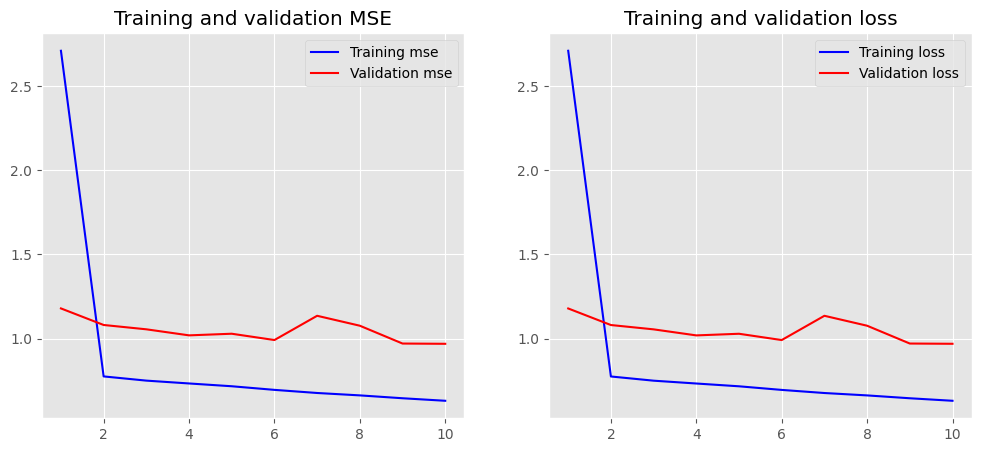

In [12]:
plot_history(history)